# Preprocessing Module with Features Data
This module adds the target column of posture to features data according to
MDS-UPDRS patients test.

## Required Imports

In [38]:
import os
import re


import pandas as pd
import numpy as np
import seaborn as sns

from src.settings import ROOT_DIR
from src.preprocessing.get_anon_id import get_anon_id
from src.utils.data_split import save_and_split

## Load Data
Loads Features and MDS-UPDRS

In [3]:
#Load Features
data: pd.DataFrame = pd.read_pickle(ROOT_DIR / 'data' / 'processed' / 'anon_imu_data_features.pkl')

#Load MDS-UPDRS
patients_mds:pd.DataFrame = pd.read_excel(ROOT_DIR / 'data' / 'raw' / 'patients_mdsupdrs_results.xlsx')
patients_mds_used_columns = ['Cédula','Postura']
patients_mds = patients_mds[patients_mds_used_columns]

In [4]:
patients_mds['Cédula'] = patients_mds['Cédula'].astype('string')

## MDS-UPDRS Target extraction

Is necessary to split patients and controls to cross ids with MDS-UPDRS test:

In [5]:
patients_mds['anon_id'] = patients_mds['Cédula'].apply(get_anon_id)
patients_mds_used_columns.pop(0)

'Cédula'

In [7]:
posture_list = []
for i in range(len(patients_mds)):
    posture_list.append(1 if patients_mds.loc[i, patients_mds_used_columns].item() > 0 else 0)

In [9]:
patients_mds['posture'] = posture_list
patients_mds = patients_mds[['anon_id', 'posture']]

In [10]:
patients_mds['posture'].value_counts()

posture
1    59
0    31
Name: count, dtype: int64

In [11]:
patients_mds = patients_mds[patients_mds['anon_id'].ne('')]

In [12]:
patients = data[data['PD'] == 1].copy()
controls = data[data['PD'] == 0].copy()

In [13]:
len(patients)

10284

In [14]:
mds_id_list = set(patients_mds['anon_id'].tolist())
df_id_list = set(patients['anon_id'].tolist())
intersection_ids = df_id_list.intersection(mds_id_list)
print(len(intersection_ids))

61


In [15]:
patients_mds = patients_mds[patients_mds['anon_id'].isin(intersection_ids)]

In [16]:
print('Patients registers before merge:',len(patients))
patients = pd.merge(patients, patients_mds, how='inner')
patients.dropna(inplace=True)
print('Patients registers after merge:',len(patients))

Patients registers before merge: 10284
Patients registers after merge: 7081


In [17]:
controls['posture'] = [0 for i in range(len(controls))]

In [18]:
posture_data = pd.concat([patients, controls])

In [19]:
len(posture_data)

16547

## Removal of not necessary columns: Left and Right limbs columns

In [20]:
pattern_right = re.compile(".*.right")
dropable_columns_right = list(filter(pattern_right.match, posture_data.columns.tolist()))
dropable_columns_right

['imu_gyroX_right_mean',
 'imu_gyroX_right_std',
 'imu_gyroX_right_mean_abs_dev',
 'imu_gyroX_right_min',
 'imu_gyroX_right_max',
 'imu_gyroX_right_range',
 'imu_gyroX_right_median',
 'imu_gyroX_right_median_abs_dev',
 'imu_gyroX_right_interquartile_range',
 'imu_gyroX_right_negative_count',
 'imu_gyroX_right_positive_count',
 'imu_gyroX_right_above_mean_count',
 'imu_gyroX_right_local_maxima_count',
 'imu_gyroX_right_skewness',
 'imu_gyroX_right_kurtosis',
 'imu_gyroY_right_mean',
 'imu_gyroY_right_std',
 'imu_gyroY_right_mean_abs_dev',
 'imu_gyroY_right_min',
 'imu_gyroY_right_max',
 'imu_gyroY_right_range',
 'imu_gyroY_right_median',
 'imu_gyroY_right_median_abs_dev',
 'imu_gyroY_right_interquartile_range',
 'imu_gyroY_right_negative_count',
 'imu_gyroY_right_positive_count',
 'imu_gyroY_right_above_mean_count',
 'imu_gyroY_right_local_maxima_count',
 'imu_gyroY_right_skewness',
 'imu_gyroY_right_kurtosis',
 'imu_gyroZ_right_mean',
 'imu_gyroZ_right_std',
 'imu_gyroZ_right_mean_abs_

In [21]:
pattern_left = re.compile(".*.left")
dropable_columns_left = list(filter(pattern_left.match, posture_data.columns.tolist()))
dropable_columns_left

['imu_gyroX_left_mean',
 'imu_gyroX_left_std',
 'imu_gyroX_left_mean_abs_dev',
 'imu_gyroX_left_min',
 'imu_gyroX_left_max',
 'imu_gyroX_left_range',
 'imu_gyroX_left_median',
 'imu_gyroX_left_median_abs_dev',
 'imu_gyroX_left_interquartile_range',
 'imu_gyroX_left_negative_count',
 'imu_gyroX_left_positive_count',
 'imu_gyroX_left_above_mean_count',
 'imu_gyroX_left_local_maxima_count',
 'imu_gyroX_left_skewness',
 'imu_gyroX_left_kurtosis',
 'imu_gyroY_left_mean',
 'imu_gyroY_left_std',
 'imu_gyroY_left_mean_abs_dev',
 'imu_gyroY_left_min',
 'imu_gyroY_left_max',
 'imu_gyroY_left_range',
 'imu_gyroY_left_median',
 'imu_gyroY_left_median_abs_dev',
 'imu_gyroY_left_interquartile_range',
 'imu_gyroY_left_negative_count',
 'imu_gyroY_left_positive_count',
 'imu_gyroY_left_above_mean_count',
 'imu_gyroY_left_local_maxima_count',
 'imu_gyroY_left_skewness',
 'imu_gyroY_left_kurtosis',
 'imu_gyroZ_left_mean',
 'imu_gyroZ_left_std',
 'imu_gyroZ_left_mean_abs_dev',
 'imu_gyroZ_left_min',
 'im

In [22]:
dropable_columns = dropable_columns_right + dropable_columns_left

In [23]:
posture_data.drop(columns=dropable_columns, inplace=True)

In [25]:
posture_data

,anon_id,date_measure,window_number,first_timestamp,imu_gyroX_spine_mean,imu_gyroX_spine_std,imu_gyroX_spine_mean_abs_dev,imu_gyroX_spine_min,imu_gyroX_spine_max,imu_gyroX_spine_range,...,imu_angularZ_spine_median_abs_dev,imu_angularZ_spine_interquartile_range,imu_angularZ_spine_negative_count,imu_angularZ_spine_positive_count,imu_angularZ_spine_above_mean_count,imu_angularZ_spine_local_maxima_count,imu_angularZ_spine_skewness,imu_angularZ_spine_kurtosis,PD,posture
0,9,2023-9-29-11-53-21,1,0.0,311.96,269.746248,200.4832,-533.0,837.0,1370.0,...,0.143210,0.292160,25,25,21,34,0.590057,0.414016,1,1
1,9,2023-9-29-11-53-21,2,532.0,49.32,512.729107,417.6016,-808.0,1268.0,2076.0,...,0.169421,0.390708,33,17,15,34,5.157702,30.368313,1,1
2,9,2023-9-29-11-53-21,3,1029.0,76.12,490.385874,376.7712,-808.0,1268.0,2076.0,...,0.273426,0.489978,35,15,15,34,2.595318,10.500248,1,1
3,9,2023-9-29-11-53-21,4,1587.0,-103.20,500.624850,414.3760,-1505.0,594.0,2099.0,...,0.406405,0.800999,32,18,19,36,1.323667,3.389447,1,1
4,9,2023-9-29-11-53-21,5,2121.0,-270.56,616.133432,499.6528,-1505.0,999.0,2504.0,...,0.358339,0.678456,29,21,19,38,0.793148,3.870439,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19745,179,2023-6-17-10-39-17,19746,38028.0,77.46,1769.381069,1544.6536,-2942.0,3824.0,6766.0,...,0.123372,0.233828,26,24,24,33,0.029906,1.908507,0,0
19746,179,2023-6-17-10-39-17,19747,39053.0,162.88,1807.994465,1589.1008,-2709.0,3824.0,6533.0,...,0.118995,0.246748,25,25,25,31,0.076009,2.026924,0,0
19747,179,2023-6-17-10-39-17,19748,40080.0,-1.46,1792.962300,1575.1832,-3073.0,3310.0,6383.0,...,0.101059,0.207691,24,26,26,34,-0.196488,4.961733,0,0
19748,179,2023-6-17-10-39-17,19749,41105.0,128.74,1856.152222,1614.3192,-3073.0,3681.0,6754.0,...,0.090871,0.174185,23,27,27,35,-1.706459,6.030742,0,0


## Feature Selection

In [26]:
temp = posture_data[posture_data.columns.tolist()[4:]].copy()

In [27]:
correlation = posture_data[posture_data.columns.tolist()[4:]].corr().abs()['posture']

In [29]:
correlation

imu_gyroX_spine_mean                     0.040182
imu_gyroX_spine_std                      0.181974
imu_gyroX_spine_mean_abs_dev             0.180750
imu_gyroX_spine_min                      0.086927
imu_gyroX_spine_max                      0.163925
                                           ...   
imu_angularZ_spine_local_maxima_count    0.196154
imu_angularZ_spine_skewness              0.008899
imu_angularZ_spine_kurtosis              0.052288
PD                                       0.667779
posture                                  1.000000
Name: posture, Length: 182, dtype: float64

In [30]:
threshold = 0.25
best_correlations_columns = []
for index, value in correlation.items():
    if value > threshold:
        best_correlations_columns.append(index)

best_correlations_columns

['imu_gyroZ_spine_std',
 'imu_gyroZ_spine_mean_abs_dev',
 'imu_gyroZ_spine_min',
 'imu_gyroZ_spine_max',
 'imu_gyroZ_spine_range',
 'imu_gyroZ_spine_median_abs_dev',
 'imu_gyroZ_spine_interquartile_range',
 'PD',
 'posture']

In [31]:
len(best_correlations_columns)

9

<Axes: >

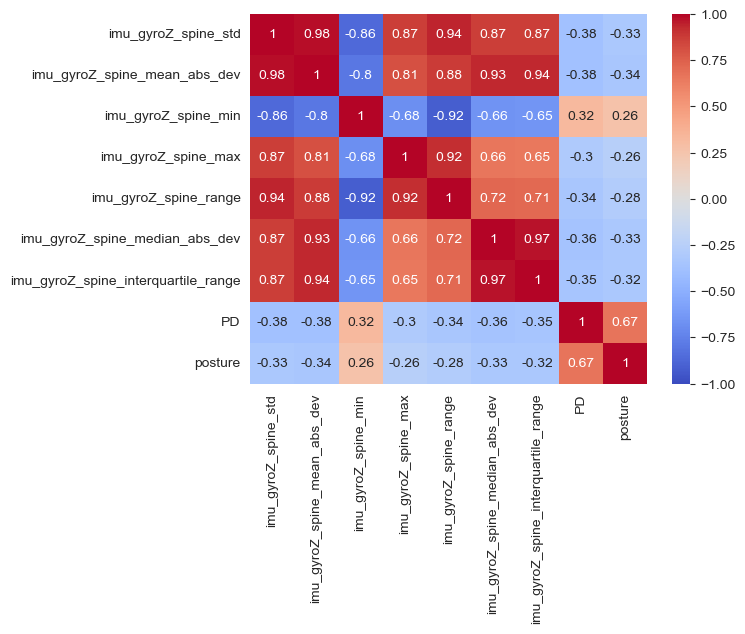

In [32]:
posture_data = posture_data[best_correlations_columns]
sns.heatmap(posture_data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Drop of highly correlated columns

In [33]:
to_drop = ['imu_gyroZ_spine_std', 'imu_gyroZ_spine_interquartile_range']

In [34]:
len(to_drop)

2

In [35]:
posture_data.drop(to_drop, axis=1, inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_11912\246359585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posture_data.drop(to_drop, axis=1, inplace=True)


In [36]:
#PD is not the target of this module, so it will be deleted
posture_data.drop(columns=['PD'], inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_11912\3750630391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posture_data.drop(columns=['PD'], inplace=True)


<Axes: >

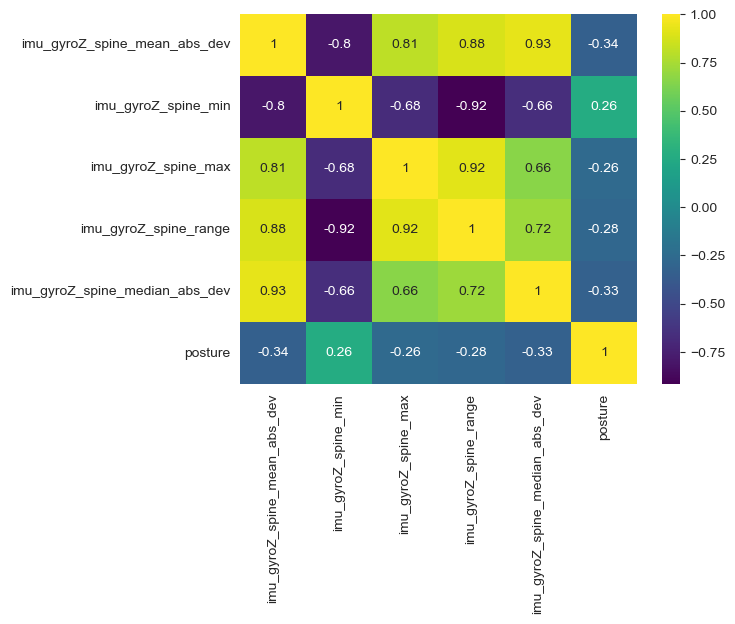

In [37]:
sns.heatmap(posture_data.corr(), annot = True, cmap= 'viridis')

## Save data

In [39]:
save_path = str(ROOT_DIR) + '/data/processed/posture-features/'
os.makedirs(save_path, exist_ok=True)

save_and_split(posture_data, 'posture-features')